In [1]:
# importing all the libraries needed 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error

#For date time functions
from datetime import datetime
from datetime import timedelta
import math

# Importing the most popular regression libraries.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, ridge_regression, Lasso, SGDRegressor, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,StackingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime

import statsmodels.tsa.api as smt

In [3]:
pip install lightgbm

In [4]:
train_data=pd.read_csv('train.csv',parse_dates=True)
features_data=pd.read_csv('features.csv',parse_dates=True)
stores_data=pd.read_csv('stores.csv')
test_data=pd.read_csv('test.csv')

In [5]:
from fbprophet import Prophet
import tqdm.notebook as tq
df = pd.DataFrame()
for i in tq.tqdm(range(1,46)):
    model=Prophet()
    filled=features_data[((features_data['Store']==i) & (features_data['Date']<'2013-05-03'))][['Date','CPI']]
    tserie = filled.rename(columns = {'Date': 'ds', 'CPI': 'y'}, inplace = False)
    tserie =tserie.sort_values(by=['ds'])
    tserie['ds'] = pd.to_datetime(tserie['ds'])
    model.fit(tserie)
    future_dates=model.make_future_dataframe(periods=13,freq = 'W',include_history =True)
    future_dates['ds'] = future_dates['ds'].apply(lambda x: x + timedelta(days=5))
    prediction=model.predict(future_dates)
    df=df.append(prediction)

df.reset_index(drop=True)
features_data['CPI1']=np.nan
for i,j in enumerate(df['yhat']):
    features_data['CPI1'].iloc[i]=j

features_data=features_data.drop(['CPI'],axis=1)
features_data = features_data.rename(columns = {'CPI1': 'CPI'})

  0%|          | 0/45 [00:00<?, ?it/s]

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disab

In [6]:
from fbprophet import Prophet
import tqdm.notebook as tq
df = pd.DataFrame()
for i in tq.tqdm(range(1,46)):
    model=Prophet()
    filled=features_data[((features_data['Store']==i) & (features_data['Date']<'2013-05-03'))][['Date','Unemployment']]
    tserie = filled.rename(columns = {'Date': 'ds', 'Unemployment': 'y'}, inplace = False)
    tserie =tserie.sort_values(by=['ds'])
    tserie['ds'] = pd.to_datetime(tserie['ds'])
    model.fit(tserie)
    future_dates=model.make_future_dataframe(periods=13,freq = 'W',include_history =True)
    future_dates['ds'] = future_dates['ds'].apply(lambda x: x + timedelta(days=5))
    prediction=model.predict(future_dates)
    df=df.append(prediction)

df.reset_index(drop=True)
features_data['Unemployment1']=np.nan
for i,j in enumerate(df['yhat']):
    features_data['Unemployment1'].iloc[i]=j

features_data=features_data.drop(['Unemployment'],axis=1)
features_data = features_data.rename(columns = {'Unemployment1': 'Unemployment'})

  0%|          | 0/45 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [7]:
stores = stores_data.merge(features_data, on ='Store' , how = 'left')
final_data_train = train_data.merge(stores, on = ['Store', 'Date', 'IsHoliday'], how = 'left')

In [8]:
stores = stores_data.merge(features_data, on ='Store' , how = 'left')
final_data_test = test_data.merge(stores, on = ['Store', 'Date', 'IsHoliday'], how = 'left')

In [9]:
print(final_data_train.shape)
print(final_data_test.shape)

(421570, 16)
(115064, 15)


In [10]:
def monthly_sales(data):
    monthly_data = data.copy()
    monthly_data.Date = monthly_data.Date.apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('Date')['Weekly_Sales'].sum().reset_index()
    monthly_data.Date = pd.to_datetime(monthly_data.Date)
    return monthly_data
monthly_df = monthly_sales(final_data_train)
monthly_df.head()

,Date,Weekly_Sales
0,2010-02-01,1.903330e+08
1,2010-03-01,1.819198e+08
2,2010-04-01,2.314124e+08
3,2010-05-01,1.867109e+08
4,2010-06-01,1.922462e+08


In [11]:
def sales_duration(data):
    data.Date = pd.to_datetime(data.Date)
    number_of_days = data.Date.max() - data.Date.min()
    number_of_years = number_of_days.days / 365
    print(number_of_days.days, 'days')
    print(number_of_years, 'years')

In [12]:
# Duration of  train dataset
sales_duration(final_data_train)

994 days
2.723287671232877 years


In [13]:
# Duration of  test dataset
sales_duration(final_data_test)

266 days
0.7287671232876712 years


In [14]:
# Average monthly sales
avg_monthly_sales = monthly_df.Weekly_Sales.mean()
print(f"Overall average monthly sales: {avg_monthly_sales}")

# Last 12 months (this will be the forecasted sales)
avg_monthly_sales_12month = monthly_df.Weekly_Sales[-12:].mean()
print(f"Last 12 months average monthly sales: {avg_monthly_sales_12month}")

Overall average monthly sales: 204158151.12454498
Last 12 months average monthly sales: 208197776.39166617


In [15]:
def markdown_imputation(final_data):    
    final_data.loc[final_data.MarkDown1.isnull() ,'MarkDown1']= 0
    final_data.loc[final_data.MarkDown2.isnull() ,'MarkDown2']= 0
    final_data.loc[final_data.MarkDown3.isnull() ,'MarkDown3']= 0
    final_data.loc[final_data.MarkDown4.isnull() ,'MarkDown4']= 0
    final_data.loc[final_data.MarkDown5.isnull() ,'MarkDown5']= 0
    return final_data

In [16]:
def weekly_sales_imputation(final_data):    
    final_data[final_data.Weekly_Sales<0]
    print('before removing negative weekly sales ,shape of final dataframe is :',final_data.shape)
    final_data=final_data[final_data.Weekly_Sales>=0]
    print('after removing negative weekly sales ,shape of final dataframe is :',final_data.shape)
    return final_data

In [17]:
def train_temp_bins(final_data):
    temp_100_110_f=final_data[((final_data.Temperature>100) & (final_data.Temperature< 110))].Weekly_Sales.sum()
    temp_90_100_f=final_data[((final_data.Temperature>90) & (final_data.Temperature< 100))].Weekly_Sales.sum()
    temp_80_90_f=final_data[((final_data.Temperature>80) & (final_data.Temperature< 90))].Weekly_Sales.sum()
    temp_70_80_f=final_data[((final_data.Temperature>70) & (final_data.Temperature< 80))].Weekly_Sales.sum()
    temp_60_70_f=final_data[((final_data.Temperature>60) & (final_data.Temperature< 70))].Weekly_Sales.sum()
    temp_50_60_f=final_data[((final_data.Temperature>50) & (final_data.Temperature< 60))].Weekly_Sales.sum()
    temp_40_50_f=final_data[((final_data.Temperature>40) & (final_data.Temperature< 50))].Weekly_Sales.sum()
    temp_30_40_f=final_data[((final_data.Temperature>30) & (final_data.Temperature< 40))].Weekly_Sales.sum() 
    temp_0_30_f=final_data[((final_data.Temperature>0) & (final_data.Temperature< 30))].Weekly_Sales.sum()   
    temp_less_than_0_f=final_data[((final_data.Temperature>-10) & (final_data.Temperature< 0))].Weekly_Sales.sum()
    final_data['Temp_bins'] = np.nan
    final_data.loc[((final_data.Temperature>-10) & (final_data.Temperature<0)) ,'Temp_bins']= temp_less_than_0_f
    final_data.loc[((final_data.Temperature>0) & (final_data.Temperature< 30)) ,'Temp_bins']= temp_0_30_f
    final_data.loc[((final_data.Temperature>30) & (final_data.Temperature< 40)) ,'Temp_bins']= temp_30_40_f
    final_data.loc[((final_data.Temperature>40) & (final_data.Temperature< 50)) ,'Temp_bins']= temp_40_50_f
    final_data.loc[((final_data.Temperature>50) & (final_data.Temperature< 60)) ,'Temp_bins']= temp_50_60_f
    final_data.loc[((final_data.Temperature>60) & (final_data.Temperature< 70)) ,'Temp_bins']= temp_60_70_f
    final_data.loc[((final_data.Temperature>70) & (final_data.Temperature< 80)) ,'Temp_bins']= temp_70_80_f
    final_data.loc[((final_data.Temperature>80) & (final_data.Temperature< 90)) ,'Temp_bins']= temp_80_90_f
    final_data.loc[((final_data.Temperature>90) & (final_data.Temperature< 100)),'Temp_bins']= temp_90_100_f
    final_data.loc[((final_data.Temperature>100) & (final_data.Temperature< 110)),'Temp_bins']= temp_100_110_f
    final_data.loc[final_data.Temp_bins.isnull() ,'Temp_bins']= 0
    list1=[temp_less_than_0_f,temp_0_30_f,temp_30_40_f,temp_40_50_f,temp_50_60_f,temp_60_70_f,temp_70_80_f,temp_80_90_f,temp_90_100_f,temp_100_110_f]
    return final_data,list1

In [18]:
def test_temp_bins(final_data,list1):
    final_data['Temp_bins'] = np.nan
    final_data.loc[((final_data.Temperature>-10) & (final_data.Temperature<0)) ,'Temp_bins']= list1[0]
    final_data.loc[((final_data.Temperature>0) & (final_data.Temperature< 30)) ,'Temp_bins']= list1[1]
    final_data.loc[((final_data.Temperature>30) & (final_data.Temperature< 40)) ,'Temp_bins']= list1[2]
    final_data.loc[((final_data.Temperature>40) & (final_data.Temperature< 50)) ,'Temp_bins']= list1[3]
    final_data.loc[((final_data.Temperature>50) & (final_data.Temperature< 60)) ,'Temp_bins']= list1[4]
    final_data.loc[((final_data.Temperature>60) & (final_data.Temperature< 70)) ,'Temp_bins']= list1[5]
    final_data.loc[((final_data.Temperature>70) & (final_data.Temperature< 80)) ,'Temp_bins']= list1[6]
    final_data.loc[((final_data.Temperature>80) & (final_data.Temperature< 90)) ,'Temp_bins']= list1[7]
    final_data.loc[((final_data.Temperature>90) & (final_data.Temperature< 100)),'Temp_bins']= list1[8]
    final_data.loc[((final_data.Temperature>100) & (final_data.Temperature< 110)),'Temp_bins']= list1[9]
    final_data.loc[final_data.Temp_bins.isnull() ,'Temp_bins']= 0
    return final_data

In [19]:
def split(final_data):
    final_data['Date'] = pd.to_datetime(final_data['Date'])
    final_data['Year'] = final_data['Date'].dt.year
    final_data['Month']= final_data['Date'].dt.month
    final_data['Week'] = final_data['Date'].dt.week
    final_data['Day']  = final_data['Date'].dt.day
    return final_data

In [20]:
import datetime
def days_from_christmas_for_train(x):
    if x['Year']== 2010 :
        diff=datetime.datetime(2010, 12, 31)-x['Date']
        return diff.days
    if ((x['Year']== 2011) and (x['Date']< datetime.datetime(2011, 12, 30))):
        diff=datetime.datetime(2011, 12, 30)-x['Date']
        return diff.days
    else:
        return 0

In [21]:
import datetime
def days_from_christmas_for_test(x):
    if x['Year']== 2010 :
        diff=datetime.datetime(2010, 12, 31)-x['Date']
        return diff.days
    if ((x['Year']== 2011) and (x['Date']< datetime.datetime(2011, 12, 30))):
        diff=datetime.datetime(2011, 12, 30)-x['Date']
        return diff.days
    if ((x['Year']== 2012) and (x['Date']< datetime.datetime(2012, 12, 28))):
        diff=datetime.datetime(2012, 12, 28)-x['Date']
        return diff.days
    if ((x['Year']== 2013) and (x['Date']< datetime.datetime(2013, 12, 27))):
        diff=datetime.datetime(2013, 12, 27)-x['Date']
        return diff.days
    else:
        return 0   

In [22]:
def days_from_thanksgiving_for_train(x):
    if ((x['Year']== 2010) and (x['Date']< datetime.datetime(2010, 11, 26))):
        diff=datetime.datetime(2010, 11, 26)-x['Date']
        return diff.days
    if ((x['Year']== 2011) and (x['Date']< datetime.datetime(2011, 11, 25))):
        diff=datetime.datetime(2011, 11, 25)-x['Date']
        return diff.days
    else:
        return 0

In [23]:
def days_from_thanksgiving_for_test(x):
    if ((x['Year']== 2010) and (x['Date']< datetime.datetime(2010, 11, 26))):
        diff=datetime.datetime(2010, 11, 26)-x['Date']
        return diff.days
    if ((x['Year']== 2011) and (x['Date']< datetime.datetime(2011, 11, 25))):
        diff=datetime.datetime(2011, 11, 25)-x['Date']
        return diff.days
    if ((x['Year']== 2012) and (x['Date']< datetime.datetime(2012, 11, 23))):
        diff=datetime.datetime(2012, 11, 23)-x['Date']
        return diff.days
    if ((x['Year']== 2013) and (x['Date']< datetime.datetime(2013, 11, 29))):
        diff=datetime.datetime(2013, 11, 29)-x['Date']
        return diff.days
    else:
        return 0

In [24]:
def holiday_type(x):
    if   (x['IsHoliday']== 1) & (x['Week']==6):
        return 1 #SuperBowl
    elif (x['IsHoliday']== 1) & (x['Week']==36):
        return 2 #LaborDay
    elif (x['IsHoliday']== 1) & (x['Week']==47):
        return 3 #Thanksgiving
    elif (x['IsHoliday']== 1) & (x['Week']==52):
        return 4 #Christmas
    else:
        return 0

In [25]:
def holiday_label(final_data):
    final_data.loc[(final_data.IsHoliday==True) ,'IsHoliday']= 1
    final_data.loc[(final_data.IsHoliday==False) ,'IsHoliday']= 0
    return final_data

In [26]:
def type_label(final_data):
    final_data.loc[(final_data.Type=='A') ,'Type']= 1
    final_data.loc[(final_data.Type=='B') ,'Type']= 2
    final_data.loc[(final_data.Type=='C') ,'Type']= 3
    return final_data

In [27]:
import holidays
def holiday_in_week_train(final_data):
    dates =[]
    for ptr in holidays.US(years = 2010).items():
        dates.append(ptr[0])
    for ptr in holidays.US(years = 2011).items():
        dates.append(ptr[0])
    for ptr in holidays.US(years = 2012).items():
        dates.append(ptr[0])
    holiday_count=[] 
    for index, row in final_data.iterrows():
        dat = final_data['Date'][index]
        dt=[]
        for i in range(0,5):
            dt.append(dat - datetime.timedelta(days = i))
        for i in range(1,3):
            dt.append(dat + datetime.timedelta(days = i))
        count = 0
        for date in dates:
            if date in dt:
                count +=1
        holiday_count.append(count)
    return holiday_count  

In [28]:
import holidays
def holiday_in_week_test(final_data):
    dates =[]
    for ptr in holidays.US(years = 2010).items():
        dates.append(ptr[0])
    for ptr in holidays.US(years = 2011).items():
        dates.append(ptr[0])
    for ptr in holidays.US(years = 2012).items():
        dates.append(ptr[0])
    for ptr in holidays.US(years = 2013).items():
        dates.append(ptr[0])
    holiday_count=[] 
    for index, row in final_data.iterrows():
        dat = final_data['Date'][index]
        dt=[]
        for i in range(0,5):
            dt.append(dat - datetime.timedelta(days = i))
        for i in range(1,3):
            dt.append(dat + datetime.timedelta(days = i))
        count = 0
        for date in dates:
            if date in dt:
                count +=1
        holiday_count.append(count)
    return holiday_count  

## Training data preprocessing and generating new features

In [29]:
final_data_train=markdown_imputation(final_data_train)
final_data_train=weekly_sales_imputation(final_data_train)
final_data_train,list1=train_temp_bins(final_data_train)
final_data_train=split(final_data_train)
final_data_train['diff_from_christmas'] = final_data_train.apply(days_from_christmas_for_train, axis=1)  
final_data_train['days_from_thanksgiving'] = final_data_train.apply(days_from_thanksgiving_for_train, axis=1)  
final_data_train['IsHoliday_bins'] = final_data_train.apply(holiday_type, axis=1)
final_data_train=holiday_label(final_data_train)
final_data_train=type_label(final_data_train)
final_data_train['Holidays'] = np.array(holiday_in_week_train(final_data_train))

before removing negative weekly sales ,shape of final dataframe is : (421570, 16)
after removing negative weekly sales ,shape of final dataframe is : (420285, 16)


## Test data preprocessing and generating new features

In [30]:
final_data_test=markdown_imputation(final_data_test)
final_data_test=test_temp_bins(final_data_test,list1)
final_data_test=split(final_data_test)
final_data_test['diff_from_christmas'] = final_data_test.apply(days_from_christmas_for_test, axis=1) 
final_data_test['days_from_thanksgiving'] = final_data_test.apply(days_from_thanksgiving_for_test, axis=1)   
final_data_test['IsHoliday_bins'] = final_data_test.apply(holiday_type, axis=1)
final_data_test=holiday_label(final_data_test)
final_data_test=type_label(final_data_test)
final_data_test['Holidays'] = np.array(holiday_in_week_test(final_data_test))

In [31]:
final_data_train=final_data_train.reset_index(drop=True)
final_data_test=final_data_test.reset_index(drop=True)

## feature importance

10


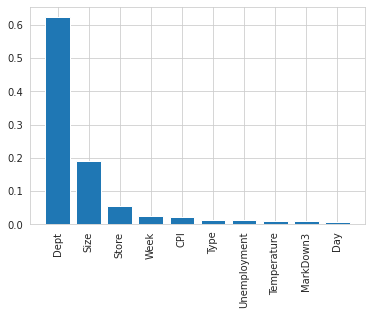

In [ ]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
final_data_train['Date']=pd.to_numeric(pd.to_datetime(final_data_train['Date']))
y = final_data_train['Weekly_Sales']
X = final_data_train.drop(['Weekly_Sales'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
model = RandomForestRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_

indices=np.argsort(importance)[::-1]
indices=indices[:10]
feature_names=X_train.columns
name=[feature_names[i] for i in indices]
print(len(name))
plt.bar(range(10),importance[indices])
plt.xticks(range(10),name)
plt.xticks(rotation='vertical')
plt.show()

In [32]:
def WMAE(dataset, real, predicted):
  
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

## 1.Linear regression

In [33]:
final_data_train1=final_data_train.copy()

In [34]:
y = final_data_train['Weekly_Sales']
X = final_data_train.drop(['Weekly_Sales'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Train:Test = 70:30 splitting.
# Final shapes.
print('Train shape:', X_train.shape, y_train.shape)
print('Test shape: ', X_test.shape, y_test.shape)

Train shape: (294199, 24) (294199,)
Test shape:  (126086, 24) (126086,)


In [35]:
final_data_train1=final_data_train1[['Store','Dept','IsHoliday','IsHoliday_bins','Size','Week','Type','Temperature','CPI','Unemployment','Weekly_Sales','Day']]
y = final_data_train1['Weekly_Sales']
X = final_data_train1.drop(['Weekly_Sales'], axis=1) 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3) # Train:Test = 70:30 splitting.
# Final shapes.
print('Train shape:', X_train1.shape, y_train1.shape)
print('Test shape: ', X_test1.shape, y_test1.shape)

Train shape: (294199, 11) (294199,)
Test shape:  (126086, 11) (126086,)


In [ ]:
model_lr = LinearRegression(fit_intercept=True,normalize=True).fit(X_train1,y_train1)
y_pred_train_lr1 = model_lr.predict(X_train1)
y_pred_test_lr1 = model_lr.predict(X_test1)
print("Train WMAE-", WMAE(X_train1, y_train1, y_pred_train_lr1))
print("Test WMAE-", WMAE(X_test1, y_test1, y_pred_test_lr1))

Train WMAE- 14789.38
Test WMAE- 14863.66


### After domain knowledge feature selection

In [ ]:
final_data_train=final_data_train[['Store','Dept','IsHoliday','Size','Week','Type','Year','Weekly_Sales','Holidays','Day']]
y = final_data_train['Weekly_Sales']
X = final_data_train.drop(['Weekly_Sales'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Train:Test = 70:30 splitting.
# Final shapes.
print('Train shape:', X_train.shape, y_train.shape)
print('Test shape: ', X_test.shape, y_test.shape)

Train shape: (294199, 9) (294199,)
Test shape:  (126086, 9) (126086,)


In [ ]:
model_lr = LinearRegression(fit_intercept=True,normalize=True).fit(X_train,y_train)
y_pred_train_lr = model_lr.predict(X_train)
y_pred_test_lr = model_lr.predict(X_test)
print("Train WMAE-", WMAE(X_train, y_train, y_pred_train_lr))
print("Test WMAE-", WMAE(X_test, y_test, y_pred_test_lr))

Train WMAE- 14852.8
Test WMAE- 14837.2


## 2.Random forest

In [ ]:
n_estimators = [140,150,160]
max_depth = [25,27]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

rf_Model = RandomForestRegressor(n_jobs = -1)

from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 3, verbose=2, n_jobs = -1)
rf_RandomGrid.fit(X_train, y_train)

In [ ]:
rf_RandomGrid.best_params_

In [ ]:
from sklearn.externals import joblib
rf_Model = RandomForestRegressor(n_estimators= 140,max_depth=27,n_jobs = -1)
rf_Model.fit(X_train,y_train)
# y_pred_train_lr = rf_Model.predict(X_train)
# y_pred_test_lr = rf_Model.predict(X_test)
# print("Train WMAE-", WMAE(X_train, y_train, y_pred_train_lr))
# print("Test WMAE-", WMAE(X_test, y_test, y_pred_test_lr))
joblib.dump(rf_Model, 'model.pkl')

In [ ]:
rf_Model = RandomForestRegressor(n_estimators= 140,max_depth=27,n_jobs = -1)
rf_Model.fit(X_train1,y_train1)
y_pred_train_lr1 = rf_Model.predict(X_train1)
y_pred_test_lr1 = rf_Model.predict(X_test1)
print("Train WMAE-", WMAE(X_train1, y_train1, y_pred_train_lr1))
print("Test WMAE-", WMAE(X_test1, y_test1, y_pred_test_lr1))

Train WMAE- 575.3
Test WMAE- 1528.24


### Domain features

In [ ]:
rf_Model = RandomForestRegressor(n_estimators= 140,max_depth=27,n_jobs = -1)
rf_Model.fit(X_train,y_train)
y_pred_train_lr = rf_Model.predict(X_train)
y_pred_test_lr = rf_Model.predict(X_test)
print("Train WMAE-", WMAE(X_train, y_train, y_pred_train_lr))
print("Test WMAE-", WMAE(X_test, y_test, y_pred_test_lr))

Train WMAE- 547.67
Test WMAE- 1455.41


## 3.kNN

In [ ]:
# final_data_train['Date'] = pd.to_numeric(pd.to_datetime(final_data_train['Date']))
neigh = KNeighborsRegressor(n_jobs=-1)
parameters = {'n_neighbors':list(range(1,26,3))}
clf = RandomizedSearchCV(neigh, parameters, cv=4)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None, n_jobs=-1,
                                                 n_neighbors=5, p=2,
                                                 weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 4, 7, 10, 13, 16, 19,
                                                        22, 25]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
clf.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                    weights='uniform')

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=4, n_jobs=-1)
neigh.fit(X_train1, y_train1)
y_tr_knn1 = neigh.predict(X_train1)
y_test_knn1 = neigh.predict(X_test1)
print("Train WMAE-", WMAE(X_train1, y_train1, y_tr_knn1))
print("Test WMAE-", WMAE(X_test1, y_test1, y_test_knn1))

Train WMAE- 9427.78
Test WMAE- 12169.99


### Domain feaures

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=4, n_jobs=-1)
neigh.fit(X_train, y_train)
y_tr_knn = neigh.predict(X_train)
y_test_knn = neigh.predict(X_test)
print("Train WMAE-", WMAE(X_train, y_train, y_tr_knn))
print("Test WMAE-", WMAE(X_test, y_test, y_test_knn))

Train WMAE- 7959.46
Test WMAE- 10515.05


## 4.LightGBM regressor

In [ ]:
from lightgbm import LGBMClassifier, LGBMRegressor
X_train1['Type']=X_train1['Type'].astype('int')
X_test1['Type']=X_test1['Type'].astype('int')
X_train1['IsHoliday']=X_train1['IsHoliday'].astype('bool')
X_test1['IsHoliday']=X_test1['IsHoliday'].astype('bool')


lgb_Model = LGBMRegressor(n_estimators= 5000,max_depth=50,n_jobs = -1)
lgb_Model.fit(X_train1,y_train1)
y_pred_train_lr1 = lgb_Model.predict(X_train1)
y_pred_test_lr1 = lgb_Model.predict(X_test1)
print("Train WMAE-", WMAE(X_train1, y_train1, y_pred_train_lr1))
print("Test WMAE-", WMAE(X_test1, y_test1, y_pred_test_lr1))

Train WMAE- 1199.96
Test WMAE- 1537.84


In [ ]:
from lightgbm import LGBMClassifier, LGBMRegressor
X_train['IsHoliday']=X_train['IsHoliday'].astype('bool')
X_train['Type']=X_train['Type'].astype('int')
X_test['IsHoliday']=X_test['IsHoliday'].astype('bool')
X_test['Type']=X_test['Type'].astype('int')

lgb_Model = LGBMRegressor(n_estimators= 5000,max_depth=50,n_jobs = -1)
lgb_Model.fit(X_train,y_train)
y_pred_train_lr = lgb_Model.predict(X_train)
y_pred_test_lr = lgb_Model.predict(X_test)
print("Train WMAE-", WMAE(X_train, y_train, y_pred_train_lr))
print("Test WMAE-", WMAE(X_test, y_test, y_pred_test_lr))

Train WMAE- 1215.31
Test WMAE- 1478.31


## 6.CatBoostRegressor

In [ ]:
pip install catboost

     |████████████████████████████████| 67.4 MB 70 kB/s 


In [ ]:
from catboost import CatBoostClassifier, CatBoostRegressor
X_train1['Type']=X_train1['Type'].astype('int')
X_test1['Type']=X_test1['Type'].astype('int')
X_train1['IsHoliday']=X_train1['IsHoliday'].astype('bool')
X_test1['IsHoliday']=X_test1['IsHoliday'].astype('bool')


lgb_Model = CatBoostRegressor(learning_rate=.9,iterations=200,depth=16,l2_leaf_reg=.2)
lgb_Model.fit(X_train1,y_train1)
y_pred_train_lr1 = lgb_Model.predict(X_train1)
y_pred_test_lr1 = lgb_Model.predict(X_test1)
print("Train WMAE-", WMAE(X_train1, y_train1, y_pred_train_lr1))
print("Test WMAE-", WMAE(X_test1, y_test1, y_pred_test_lr1))

0:	learn: 13682.4046128	total: 2.58s	remaining: 8m 34s
1:	learn: 10678.8676380	total: 3.59s	remaining: 5m 55s
2:	learn: 9695.5174161	total: 4.57s	remaining: 5m
3:	learn: 8882.7327743	total: 5.57s	remaining: 4m 32s
4:	learn: 8317.9426616	total: 6.57s	remaining: 4m 16s
5:	learn: 7325.9985409	total: 7.57s	remaining: 4m 4s
6:	learn: 6820.2711211	total: 8.56s	remaining: 3m 56s
7:	learn: 6380.4930823	total: 9.56s	remaining: 3m 49s
8:	learn: 6103.3792891	total: 10.6s	remaining: 3m 44s
9:	learn: 5867.0981643	total: 11.5s	remaining: 3m 39s
10:	learn: 5647.3774870	total: 12.6s	remaining: 3m 35s
11:	learn: 5495.5497222	total: 13.6s	remaining: 3m 32s
12:	learn: 5363.0255688	total: 14.5s	remaining: 3m 29s
13:	learn: 5185.4831166	total: 15.5s	remaining: 3m 26s
14:	learn: 5033.0594053	total: 16.5s	remaining: 3m 23s
15:	learn: 4863.4076662	total: 17.5s	remaining: 3m 21s
16:	learn: 4717.5382308	total: 18.5s	remaining: 3m 19s
17:	learn: 4529.7837385	total: 19.5s	remaining: 3m 16s
18:	learn: 4443.4258657

In [ ]:
from catboost import CatBoostClassifier, CatBoostRegressor
X_train['IsHoliday']=X_train['IsHoliday'].astype('bool')
X_train['Type']=X_train['Type'].astype('int')
X_test['IsHoliday']=X_test['IsHoliday'].astype('bool')
X_test['Type']=X_test['Type'].astype('int')

lgb_Model = CatBoostRegressor(learning_rate=.9,iterations=200,depth=16,l2_leaf_reg=.2)
lgb_Model.fit(X_train,y_train)
y_pred_train_lr = lgb_Model.predict(X_train)
y_pred_test_lr = lgb_Model.predict(X_test)
print("Train WMAE-", WMAE(X_train, y_train, y_pred_train_lr))
print("Test WMAE-", WMAE(X_test, y_test, y_pred_test_lr))

## Xgboostregressor

In [36]:
X_train1['Type']=X_train1['Type'].astype('int')
X_test1['Type']=X_test1['Type'].astype('int')
X_train1['IsHoliday']=X_train1['IsHoliday'].astype('bool')
X_test1['IsHoliday']=X_test1['IsHoliday'].astype('bool')

lgb_Model = XGBRegressor(max_depth=27, n_estimators=100)
lgb_Model.fit(X_train1,y_train1)
y_pred_train_lr1 = lgb_Model.predict(X_train1)
y_pred_test_lr1 = lgb_Model.predict(X_test1)
print("Train WMAE-", WMAE(X_train1, y_train1, y_pred_train_lr1))
print("Test WMAE-", WMAE(X_test1, y_test1, y_pred_test_lr1))

[16:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train WMAE- 11.66
Test WMAE- 1364.46


In [38]:
from xgboost import XGBClassifier, XGBRegressor
X_train['IsHoliday']=X_train['IsHoliday'].astype('bool')
X_train['Type']=X_train['Type'].astype('int')
X_test['IsHoliday']=X_test['IsHoliday'].astype('bool')
X_test['Type']=X_test['Type'].astype('int')
X_train['Date']=pd.to_numeric(pd.to_datetime(X_train['Date']))
X_test['Date']=pd.to_numeric(pd.to_datetime(X_test['Date']))

lgb_Model = XGBRegressor(max_depth=27, n_estimators=100)
lgb_Model.fit(X_train,y_train)
y_pred_train_lr = lgb_Model.predict(X_train)
y_pred_test_lr = lgb_Model.predict(X_test)
print("Train WMAE-", WMAE(X_train, y_train, y_pred_train_lr))
print("Test WMAE-", WMAE(X_test, y_test, y_pred_test_lr))

[16:55:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train WMAE- 10.56
Test WMAE- 1437.82


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
X_train['IsHoliday']=X_train['IsHoliday'].astype('bool')
X_train['Type']=X_train['Type'].astype('int')
X_test['IsHoliday']=X_test['IsHoliday'].astype('bool')
X_test['Type']=X_test['Type'].astype('int')

estimators = [
     ('lr', RidgeCV(normalize = True)),
     ('svr', LinearSVR(random_state=42)),
     ('gb', LGBMRegressor(n_estimators=8000, max_depth=25)),
     ('rf', RandomForestRegressor(n_estimators=100))]
reg = StackingRegressor(
     estimators=estimators,
     final_estimator=RandomForestRegressor())
reg.fit(X_train,y_train)
y_pred_train_lr = reg.predict(X_train)
y_pred_test_lr = reg.predict(X_test)
print("Train WMAE-", WMAE(X_train, y_train, y_pred_train_lr))
print("Test WMAE-", WMAE(X_test, y_test, y_pred_test_lr))

Train WMAE- 1760.12
Test WMAE- 1994.69


## Training on whole train data and predicting on actual test data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
final_data_train['Date']=pd.to_numeric(pd.to_datetime(final_data_train['Date']))
final_data_test['Date'] = pd.to_numeric(pd.to_datetime(final_data_test['Date']))
y = final_data_train['Weekly_Sales']
X = final_data_train.drop(['Weekly_Sales'], axis=1)
rf_Model = RandomForestRegressor(n_estimators= 140,max_depth=27,n_jobs = -1)
rf_Model.fit(X, y)

In [ ]:
y_hat= rf_Model.predict(final_data_test)

In [ ]:
sample_submission=pd.read_csv('sampleSubmission.csv')
sample_submission['Weekly_Sales']=list(y_hat)
sample_submission.to_csv('submission.csv',index=False)